# Task4 seaborn可视化(一)

- Matplotlib试着让简单的事情更加简单，困难的事情变得可能，而Seaborn就是让困难的东西更加简单。
- seaborn是针对统计绘图的，一般来说，seaborn能满足数据分析90%的绘图需求。
- Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，应该把Seaborn视为matplotlib的补充，而不是替代物。
- 用matplotlib最大的困难是其默认的各种参数，而Seaborn则完全避免了这一问题。

- 本章知识点如下：
    - 导入相关库
    - 加载seaborn自带数据集：load_dataset()
    - 画布主题：set_style()
    - 关系类图表：relplot()
    - 散点图：scatterplot() 
    - 折线图：lineplot()
    - 分类图表：catplot()
    - 分类散点图：stripplot()和swarmplot()
    - 箱图和增强箱图：boxplot()和boxenplot()
    - 小提琴图：violinplot()
    - 点图：pointplot()
    - 条形图：barplot()
    - 计数图：countplot()
- 小作业：
    - 第一题：绘制多个分类的散点图
    - 第二题：绘制2010年人口年龄结构金字塔
    - 第三题：绘制各年龄段男VS女占比差异线图

## 1. 导入相关库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## 2. 加载seaborn自带数据集

In [2]:
#如果报错，可以去https://github.com/mwaskom/seaborn-data，将数据集下载到本地，设置cache参数为True，data_home放本地路径；
#tip = sns.load_dataset('tips')
#tip 

#filepath = '/home/mw/input/data1329'
filepath = 'E:\Anaconda2020\Lib\site-packages\seaborn\seaborn-data'
tips = sns.load_dataset("tips", cache=True, data_home=filepath)
fmri = sns.load_dataset("fmri", cache=True, data_home=filepath)
exercise = sns.load_dataset("exercise", cache=True, data_home=filepath)
titanic =  sns.load_dataset("titanic", cache=True, data_home=filepath)

## 3. 画布主题

- 关于如何调节图像的样式，这一块自由度太高就不具体介绍，就简单介绍一个修改背景的功能。画布主题共有五种类型：
    - darkgrid：灰色网格
    - whitegrid：白色网格
    - dark：灰色
    - white：白色
    - ticks：这个主题比white主题多的是刻度线；
- 利用set_style()来修改，不过这个修改是全局性的，会影响后面所有的图像。

### 3.1 绘制三条sin函数曲线

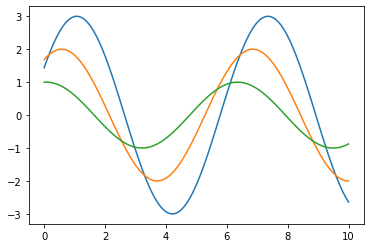

In [3]:
def sinplot(flip = 1):
    x = np.linspace(0, 10, 100)
    for i in range(1, 4):
        plt.plot(x, np.sin(x + i * 0.5) * (4 - i) * flip)
sinplot()

### 3.2 设置背景为默认主题

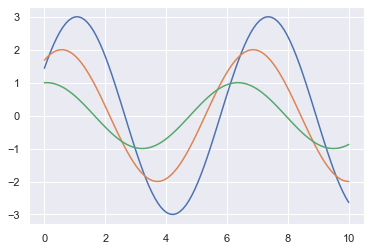

In [4]:
sns.set() # 默认主题：灰色网格；修改具有全局性
sinplot()

### 3.3 修改背景为白色网格主题

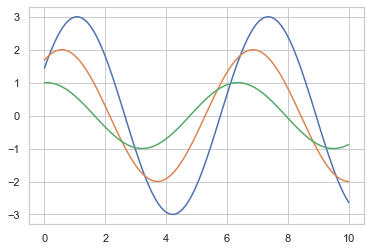

In [5]:
sns.set_style('whitegrid')
sinplot()

#注：带有网格的主题便于读数

### 3.4 去掉不必要的边框：sns.despine()

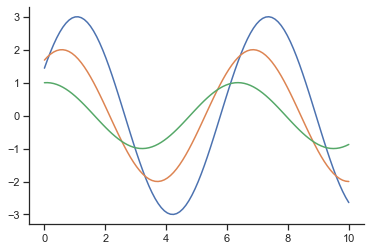

In [6]:
sns.set_style("ticks")
sinplot() # 这个主题比white主题多的是刻度线
sns.despine() #去掉不必要的边框

- 去掉了上边框和右边框，despine()还有别的参数，例如offset参数用于设置轴线偏移，更多参数可以自行搜索相关资料；

### 3.5 设置临时主题：内部白色网格，外部灰色主题

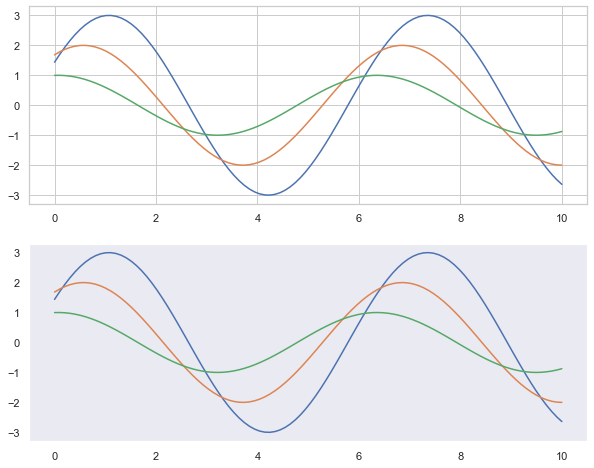

In [7]:
plt.figure(figsize = (10, 8))
sns.set_style('dark')
with sns.axes_style('whitegrid'): # with内部的都是白色网格主题，对外部不受影响
    plt.subplot(2, 1, 1) #绘制多图函数，两行一列第一个子图
    sinplot()
plt.subplot(2, 1, 2) # 两行一列第二个子图
sinplot()

### 3.6 标签与图形粗细调整：set_context()

- 当需要保存图表时，默认的参数保存下来的图表上刻度值或者标签有可能太小，有些模糊，可以通过set_context()方法设置参数。使保存的图表便于阅读。
- 有4种预设好的上下文(context)，按相对大小排序分别是:
    - paper
    - notebook # 默认
    - talk
    - poster

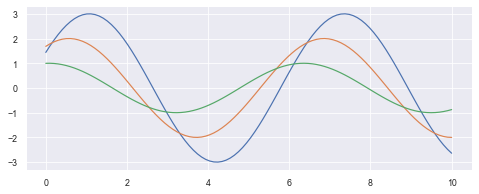

In [8]:
sns.set()
plt.figure(figsize=(8,3))
sns.set_context("paper")
sinplot()

#其他参数自行尝试：

## 4. 关系类图表：relplot()

- relplot() 关系类图表的接口，其实是下面两种图的集成，通过指定kind参数可以画出下面的两种图：
    - scatterplot() 散点图
    - lineplot() 折线图

### 4.1 基本的散点图

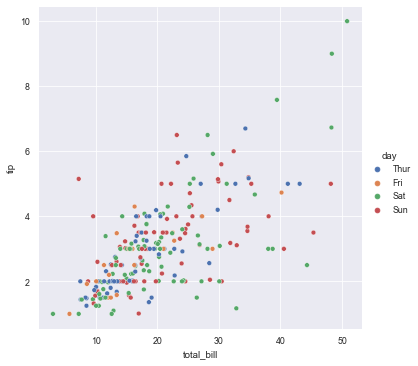

In [9]:
sns.relplot(x="total_bill", y="tip", hue='day', data=tips)

### 4.2 设置col=列的名称  则根据列的类别展示数据(该列的值有多少种，则将图以多少列显示)

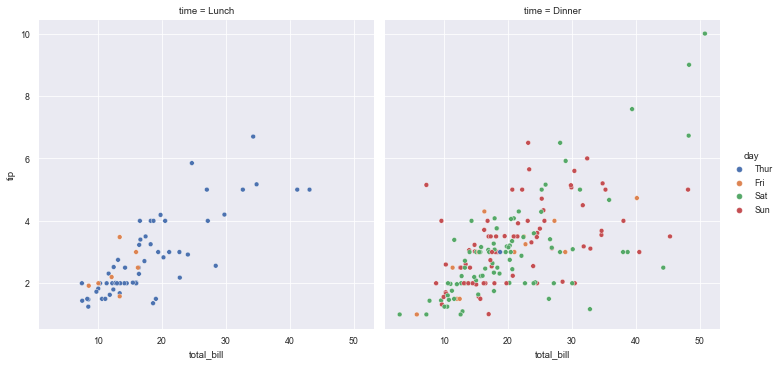

In [10]:
sns.relplot(x="total_bill", y="tip", hue="day", col="time", data=tips)

#若设置row=列的名称 则根据列的类别展示数据(该列的值有多少种，则将图以多少行显示)

### 4.3 布局：如果同时设置col和row，则相同的row在同一行，相同的col在同一列

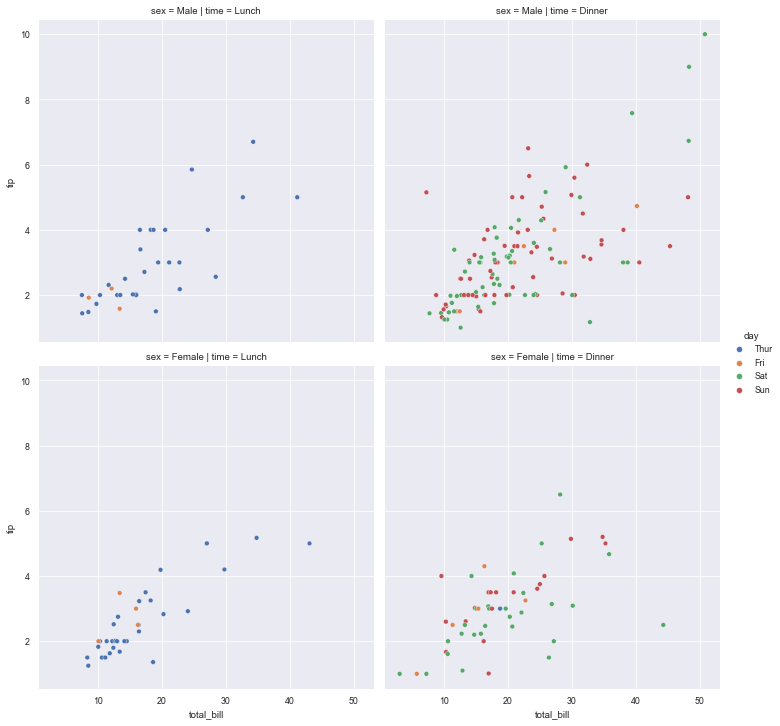

In [11]:
sns.relplot(x="total_bill", y="tip", hue="day", col="time", row="sex", data=tips)

## 5. 散点图：scatterplot()

- 可以通过调整颜色、大小和样式等参数来显示数据之间的关系

### 5.1 绘制基本散点图

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

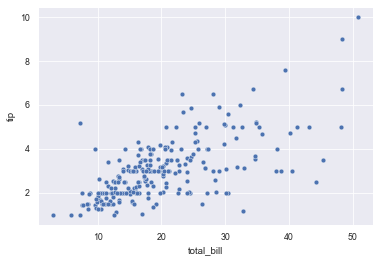

In [12]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

### 5.2 设置hue，根据设置的类别，产生颜色不同的点的散点图

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

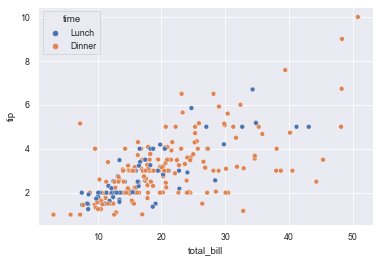

In [13]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

### 5.3 设置hue，根据设置的类别，产生颜色不同的点的散点图，设置style，使其生成不同的标记的点

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

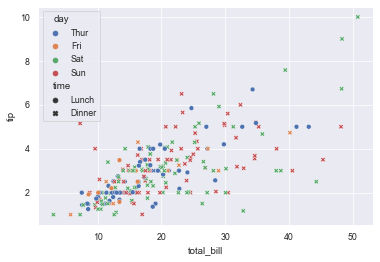

In [14]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=tips)

### 5.4 设置size，根据设置的类别，产生大小不同的点的散点图

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

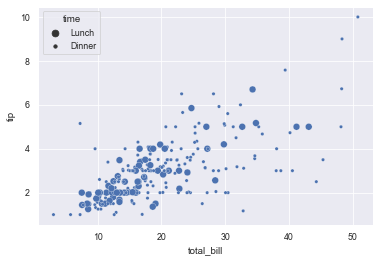

In [15]:
sns.scatterplot(x="total_bill", y="tip", size="time", data=tips)

### 5.5 使用指定的标记

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

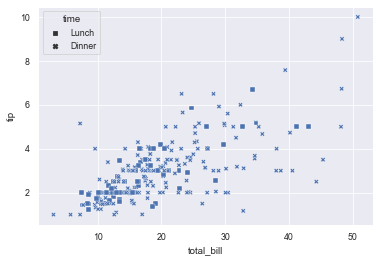

In [16]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(x="total_bill", y="tip", style="time",
                markers=markers,
                data=tips)

## 6. 折线图：lineplot()

### 6.1 绘制带有误差带的单线图，显示置信区间

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

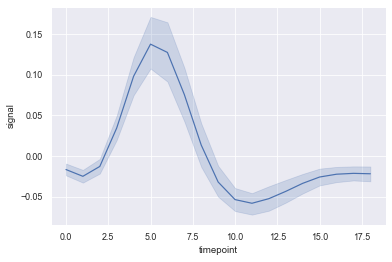

In [17]:
#seaborn自带的fmri数据集，加载数据集见第二部分；
sns.lineplot(x='timepoint', y='signal', data=fmri)

### 6.2 使用颜色和线型显示分组变量

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

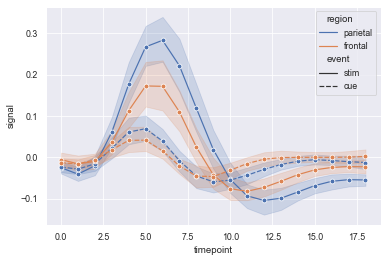

In [18]:
sns.lineplot(x='timepoint', y="signal",
             # 对将要生成不同颜色的线进行分组
             hue="region", 
             #对将生成具有不同破折号、或其他标记的变量进行分组
             style="event", 
             #圆点标注
             marker='o',
             #数据集
             data=fmri)

### 6.3 显示错误条，而不显示错误带

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

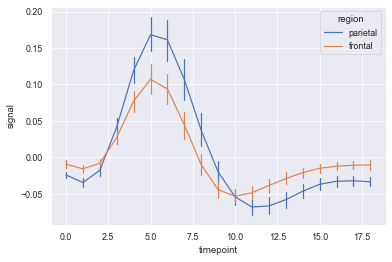

In [19]:
sns.lineplot(x='timepoint', y="signal", hue="region", err_style="bars", ci=68, data=fmri)

## 7. 分类图表：catplot()

- catplot() 分类图表的接口，其实是下面八种图表的集成，通过指定kind参数可以画出下面的八种图：
    - stripplot() 分类散点图
    - swarmplot() 能够显示分布密度的分类散点图
    - boxplot() 箱图
    - violinplot() 小提琴图
    - boxenplot() 增强箱图
    - pointplot() 点图
    - barplot() 条形图
    - countplot() 计数图

### 7.1 基本分类图

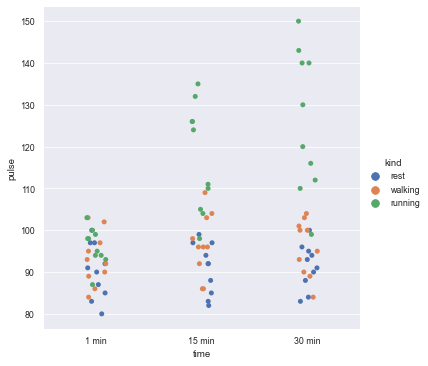

In [20]:
#seaborn自带exercise数据集,加载见第二部分；
sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

### 7.2 通过设置kind来指定绘制的图类型

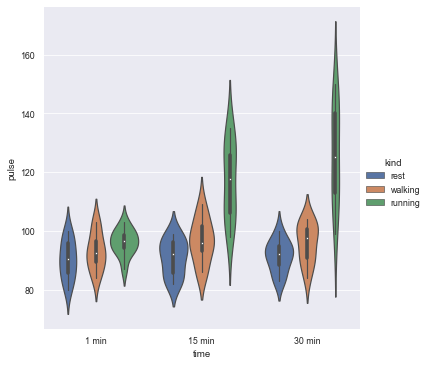

In [21]:
# kind="violin" 则表示绘制小提琴图
sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="violin")

### 7.3 根据col分类，以列布局绘制多列图

- 设置col，根据指定的col的变量名，以列的形式显示(eg.col='diet',则在列的方向上显示，显示图的数量为diet列中对值去重后的数量)

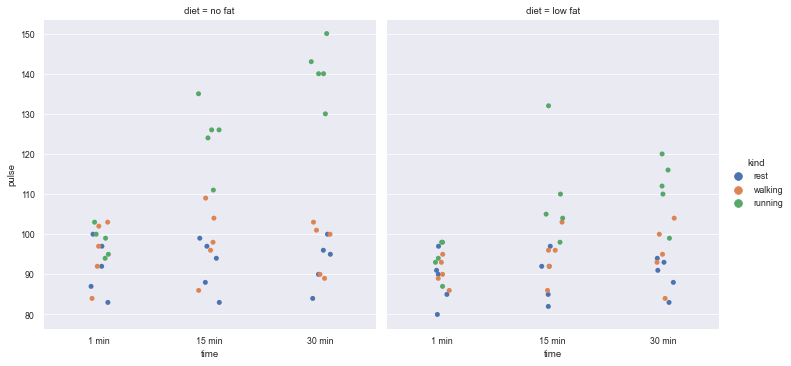

In [22]:
sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise)

### 7.4 绘图时，设置图的高度和宽度比

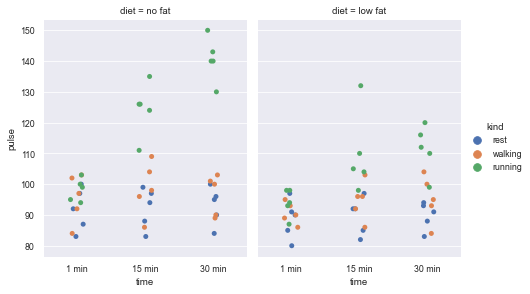

In [23]:
sns.catplot(x="time", y="pulse", hue="kind",col="diet", data=exercise, height=4, aspect=.8)

### 7.5 利用catplot()绘制柱状图 kind="count"

- 设置col_wrap一个数值，让图每行只显示数量为该数值的列，多余的另起一行显示

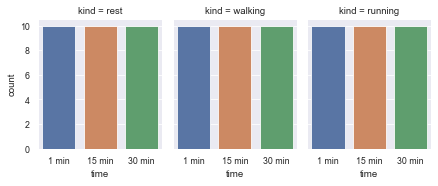

In [24]:
sns.catplot(x="time", col="kind", col_wrap=3, data=exercise, kind="count", height=2.5, aspect=.8)

## 8. 分类散点图：stripplot()和swarmplot()

### 8.1 分类散点图：stripplpt()

- stripplot()可以自己实现对数据分类的展现，也可以作为盒形图或小提琴图的一种补充，用来显示所有结果以及基本分布情况。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

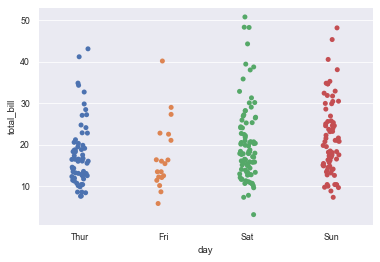

In [25]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
# jitter=False数据将会发生很多的重叠

### 8.2 分簇散点图：swarmplot()

- 分簇散点图 可以理解为数据点不重叠的分类散点图。
- 该函数类似于stripplot()，但该函数可以对点进行一些调整，使得数据点不重叠。
- swarmplot()可以自己实现对数据分类的展现，也可以作为盒形图或小提琴图的一种补充，用来显示所有结果以及基本分布情况。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

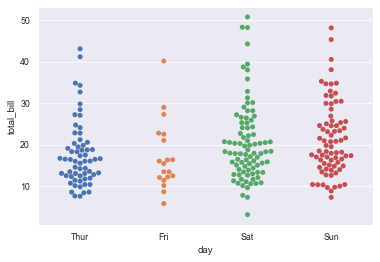

In [26]:
sns.swarmplot(x='day', y='total_bill', data=tips)
# 数据不会发生重叠

<AxesSubplot:xlabel='total_bill', ylabel='day'>

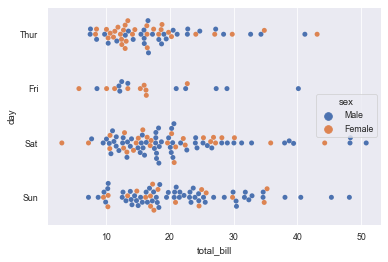

In [27]:
#hue对数据进行分类
sns.swarmplot(x='total_bill', y='day', data=tips, hue='sex')

## 9. 箱图和增强箱图：boxplot()和boxenplot()

### 9.1 箱图：boxplot()

- 箱图又称盒形图，主要用来显示与类别相关的数据分布。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

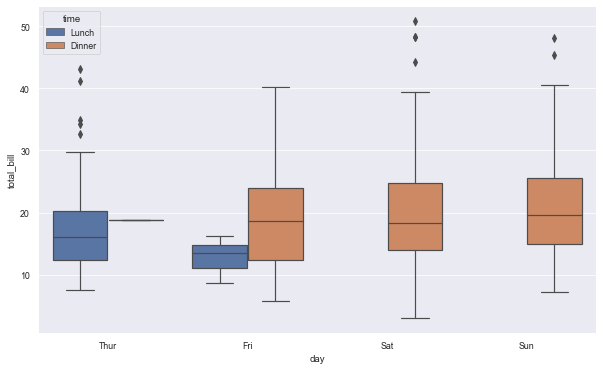

In [28]:
#使用seaborn自带的tips数据集，加载见第二部分；
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)

### 9.2 箱型与分类散点组合图

<AxesSubplot:xlabel='day', ylabel='total_bill'>

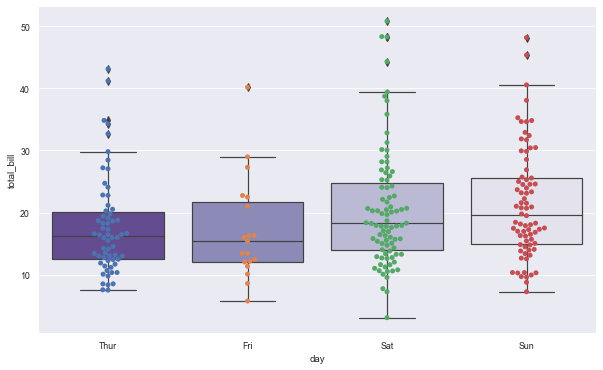

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='Purples_r')
sns.swarmplot(x='day', y='total_bill', data=tips)

### 9.3 利用catplot()来实现boxplot()的效果(通过指定kind="box")

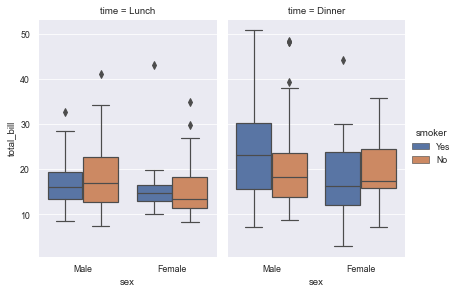

In [30]:
sns.catplot(x="sex", y="total_bill",
            hue="smoker", 
            col="time",
            data=tips, 
            kind="box",
            height=4, 
            aspect=.7);

### 9.4 增强箱图：boxenplot()

- 增强箱图又称增强盒形图，可以为大数据集绘制增强的箱图。
- 增强箱图通过绘制更多的分位数来提供数据分布的信息。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

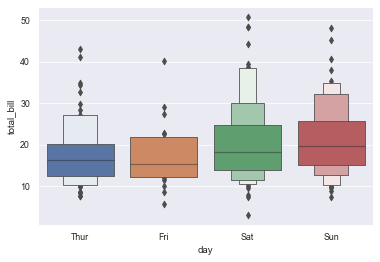

In [31]:
sns.boxenplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

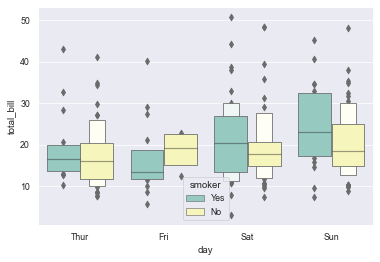

In [32]:
#通过设置hue对分组数据进行第二次分类
#注意：在增强箱图中，对hue设置后的第二次分类的效果是分离
sns.boxenplot(x="day", y="total_bill", hue="smoker",
              data=tips, palette="Set3")

### 9.5 利用catplot()来实现boxenplot()的效果(通过指定kind="boxen")

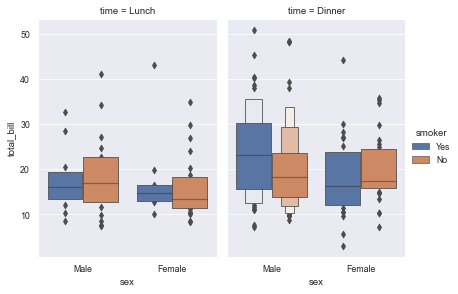

In [33]:
# 利用catplot()来实现boxenplot()的效果(通过指定kind="boxen")
sns.catplot(x="sex", y="total_bill",
            hue="smoker", 
            col="time",
            data=tips, 
            kind="boxen",
            height=4, 
            aspect=.7);

## 10. 小提琴图：violinplot()

- 小提琴图允许可视化一个或多个组的数字变量的分布。它与箱形图非常接近，但可以更深入地了解密度。小提琴图特别适用于数据量巨大且无法显示个别观察结果的情况。
- 小提琴图各位置对应参数，中间一条就是箱线图数据，25%，50%，75%位置，细线区间为95%置信区间。

### 10.1 绘制按sex分类的小提琴图

<AxesSubplot:xlabel='day', ylabel='total_bill'>

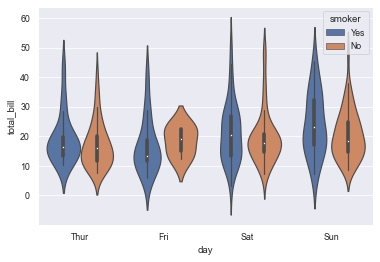

In [34]:
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips)
# 小提琴左右对称

### 10.2 添加split参数，使小提琴左右代表不同属性

<AxesSubplot:xlabel='day', ylabel='total_bill'>

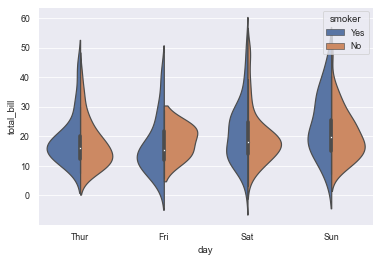

In [35]:
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, split=True)

### 10.3 小提琴与分类散点组合图

<AxesSubplot:xlabel='day', ylabel='total_bill'>

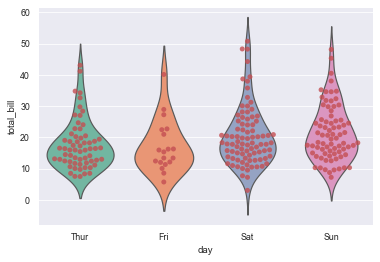

In [36]:
sns.violinplot(x='day', y='total_bill', data=tips, inner=None, palette='Set2')
sns.swarmplot(x='day', y='total_bill', data=tips, color='r', alpha=0.8)

### 10.4 使用catplot()实现violinplot()的统计效果，必须设置kind="violin"

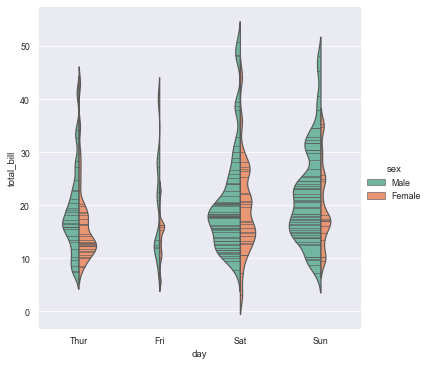

In [37]:
sns.catplot(x="day", y="total_bill",
               hue="sex",
               data=tips, 
               palette="Set2",
               split=True,
               scale="count", 
               inner="stick",
               scale_hue=False, 
               kind='violin',
               bw=.2)

## 11. 点图：pointplot()

- pointplot，如其名，就是点图。点图代表散点图位置的数值变量的中心趋势估计，并使用误差线提供关于该估计的不确定性的一些指示。

- 点图比条形图在聚焦一个或多个分类变量的不同级别之间的比较时更为有用。点图尤其善于表现交互作用：一个分类变量的层次之间的关系如何在第二个分类变量的层次之间变化。

- 重要的一点是点图仅显示平均值（或其他估计值），但在许多情况下，显示分类变量的每个级别的值的分布可能会带有更多信息。在这种情况下，其他绘图方法，例如箱型图或小提琴图可能更合适。

### 11.1 绘制点图，显示男女生存人数变化差异

<AxesSubplot:xlabel='sex', ylabel='survived'>

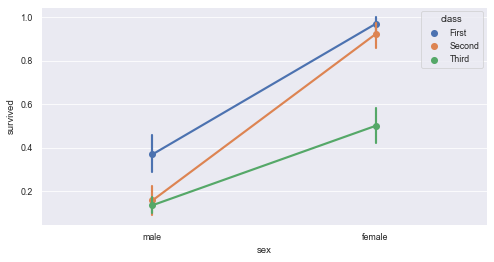

In [38]:
plt.figure(figsize=(8,4))
sns.pointplot(x='sex', y='survived', hue='class', data=titanic)

### 10.2 为点图增添些样式，使其更美观

<AxesSubplot:xlabel='class', ylabel='survived'>

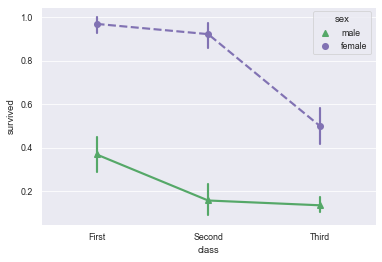

In [39]:
sns.pointplot(x='class', y='survived', hue='sex', data=titanic,
              palette={'male':'g', 'female': 'm'},        # 针对male和female自定义颜色
              markers=["^", "o"],     # 设置点的形状
              linestyles=["-", "--"]) # 设置线的类型

### 10.3 使用catplot()实现pointplot()的效果（通过设置kind="point"）

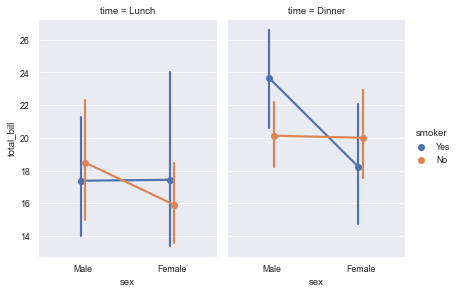

In [40]:
sns.catplot(x="sex", y="total_bill",
            hue="smoker", col="time",
            data=tips, kind="point",
            dodge=True,
            height=4, aspect=.7)

## 11. 条形图：barplot()

- 条形图主要展现的是每个矩形高度的数值变量的中心趋势的估计。
- 条形图只显示平均值（或其他估计值）。但在很多情况下，每个分类变量级别上显示值的分布可能提供更多信息，此时很多其他方法，如一个盒子或小提琴图可能更合适。

### 11.1 指定x分类变量进行分组，y为数据分布，绘制垂直条形图

<AxesSubplot:xlabel='day', ylabel='total_bill'>

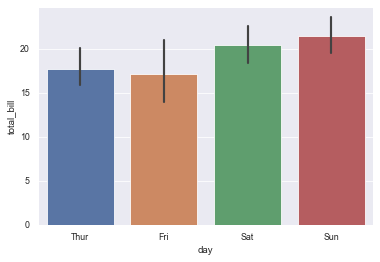

In [41]:
sns.barplot(x="day", y="total_bill", data=tips)

### 11.2 指定hue对已分组的数据进行嵌套分组(第二次分组)并绘制条形图

<AxesSubplot:xlabel='day', ylabel='total_bill'>

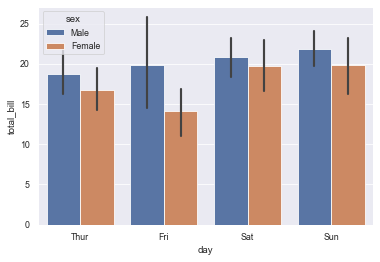

In [42]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

### 11.3 指定 y 为分类变量进行分组，x 为数据分布 (这样的效果相当于水平条形图)

<AxesSubplot:xlabel='tip', ylabel='day'>

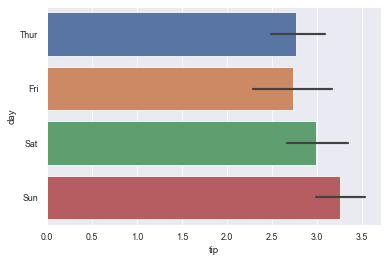

In [43]:
sns.barplot(x="tip", y="day", data=tips)

### 11.4 设置order=["变量名1","变量名2",...]来显示指定分类顺序

<AxesSubplot:xlabel='time', ylabel='tip'>

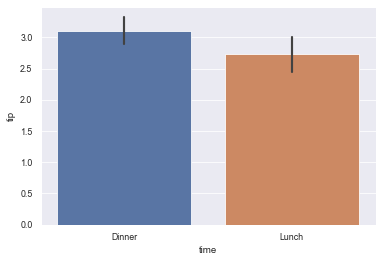

In [44]:
sns.barplot(x="time", y="tip", data=tips,
            order=["Dinner", "Lunch"])

### 11.5 使用中位数作为集中趋势的估计：estimator=median

<AxesSubplot:xlabel='day', ylabel='tip'>

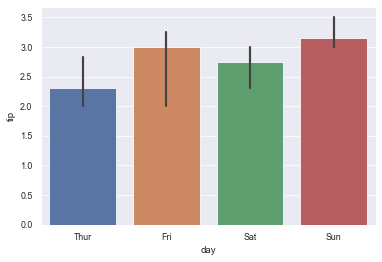

In [45]:
sns.barplot(x="day", y="tip", data=tips, estimator=np.median)

### 11.6 使用误差线显示均值的标准差

<AxesSubplot:xlabel='day', ylabel='tip'>

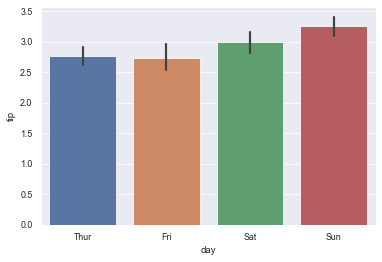

In [46]:
sns.barplot(x="day", y="tip", data=tips, ci=68)

### 11.7 使用不同的调色版：palette="Blues_d"

<AxesSubplot:xlabel='size', ylabel='total_bill'>

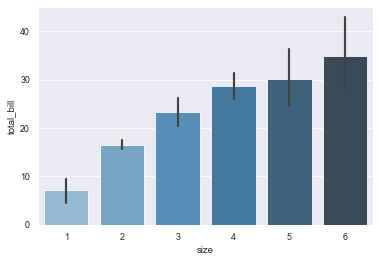

In [47]:
sns.barplot("size", y="total_bill", data=tips,
            palette="Blues_d")

### 11.8 使用catplot()实现barplot()的效果(通过指定kind=bar)

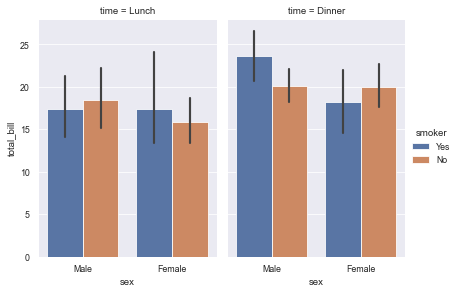

In [48]:
sns.catplot(x="sex", y="total_bill",
            hue="smoker", col="time",
            data=tips, kind="bar",
            height=4, aspect=.7)

## 12. 计数图：countplot()

- seaborn.countplot()可绘制计数图、柱状图
- 功能：使用条形图(柱状图)显示每个分类数据中的数量统计

### 12.1 显示单个分类变量的值统计数

<AxesSubplot:xlabel='who', ylabel='count'>

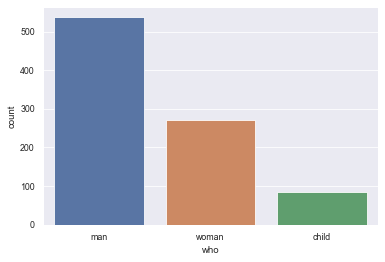

In [49]:
sns.countplot(x="who", data=titanic)

### 12.2 显示多个分类变量的值统计数

<AxesSubplot:xlabel='class', ylabel='count'>

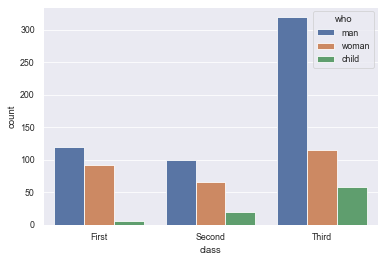

In [50]:
sns.countplot(x="class", hue="who", data=titanic)

### 12.3 水平横向绘制条形图

<AxesSubplot:xlabel='count', ylabel='class'>

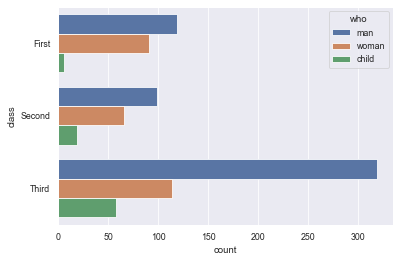

In [51]:
sns.countplot(y="class", hue="who", data=titanic)

### 12.4 使用不同调色板

<AxesSubplot:xlabel='who', ylabel='count'>

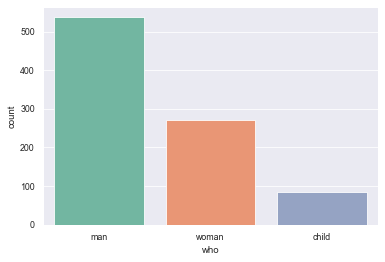

In [52]:
sns.countplot(x="who", data=titanic, palette="Set2")

### 12.5 使用catplot()来实现countplot()的统计效果，必须设置kind="count"

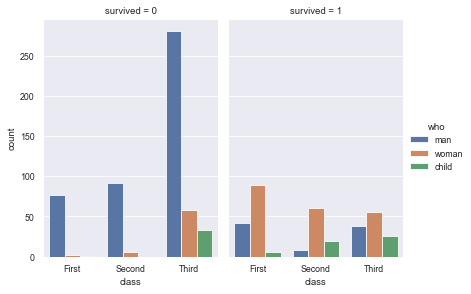

In [53]:
sns.catplot(x="class", hue="who", col="survived",
            data=titanic, kind="count",
            height=4, aspect=.7);

## 小作业

### 第一题：绘制多个分类的散点图
- 要求：
    - 利用pandas构建时间序列数据，从2000-1-31开始，以月为频率，生成100条时间序列；
    - 生成4列100个服从高斯分布的随机数，并按列求累计和（cumsum函数）；
    - 合并所有列，并设置列名为a,b,c,d，生成散点图；

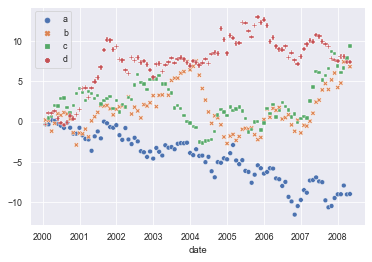

In [54]:
index = pd.date_range("2000-1-31", periods=100,
                      freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
sns.scatterplot(data=wide_df)
plt.show()

### 第二题：绘制2010年人口年龄结构金字塔

- 步骤:
    - 读取文件：people.csv
    - 筛选数据：地区:全国；性别：男和女；年龄段：不等于合计；
    - 添加一列：人口占比 = 每行的统计人数/总统计人数 * 100，并保留两位有效数字；
    - 绘制人口年龄结构金字塔（女左男右）：
        - 横轴：人口占比；纵轴：年龄段(0岁,1-4岁,5-9岁.....)
        - tips:金字塔实际相当于两个相反方向的水平条形图，然后以纵轴合并即可得到金字塔结构；
        - 注:记住修改横轴刻度，两边对称显示；

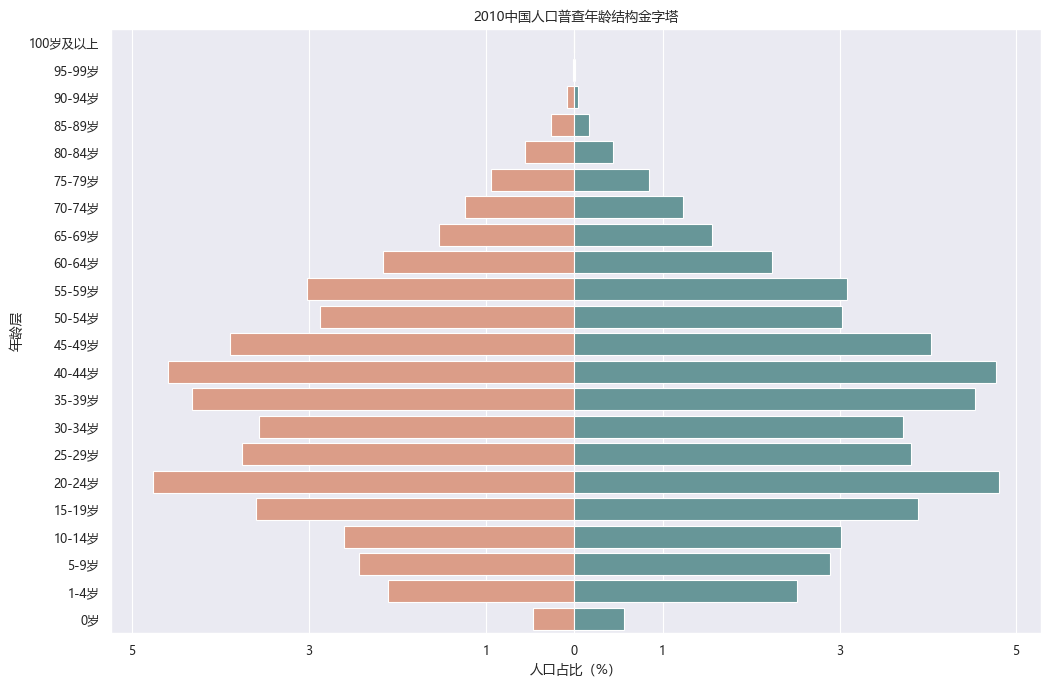

In [55]:
#设置中文字体：
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False # 避免坐标轴不能正常的显示负号

#获取数据
pcounts = pd.read_csv('/home/mw/input/data1625/people.csv')
result = pcounts[(pcounts['性别'].isin(['男','女']))&(pcounts['地区']=='全国')&(pcounts['年龄段']!='合计')]
result['人口占比'] =( result['统计人数']/result['统计人数'].sum()*100).round(2)
#可视化
plt.figure(figsize=(12,8), dpi=100)

bar_plot = sns.barplot(y = result['年龄段'].unique(), x = -result[result['性别']=='女']['人口占比'].values, color = "DarkSalmon", 
                       data = result,order = result['年龄段'].unique()[::-1],)
bar_plot = sns.barplot(y = result['年龄段'].unique(), x = result[result['性别']=='男']['人口占比'].values, color = "CadetBlue",
                       data = result,order = result['年龄段'].unique()[::-1],)

plt.xticks([-5,-3,-1,0,1,3,5],[5,3,1,0,1,3,5])

bar_plot.set(xlabel="人口占比（%）", ylabel="年龄层", title = "2010中国人口普查年龄结构金字塔")
plt.show()

### 第三题：绘制各年龄段男VS女占比差异线图
- 步骤：
    - 构建所需数据框：各年龄段，男占比，女占比；
    - 占比差异即为：男占比-女占比；
    - 横轴：各年龄段；纵轴：占比差异；
    - 绘制线图
        - 添加横纵轴标签；
        - 添加标题；
        - 设置横轴标签旋转45度；

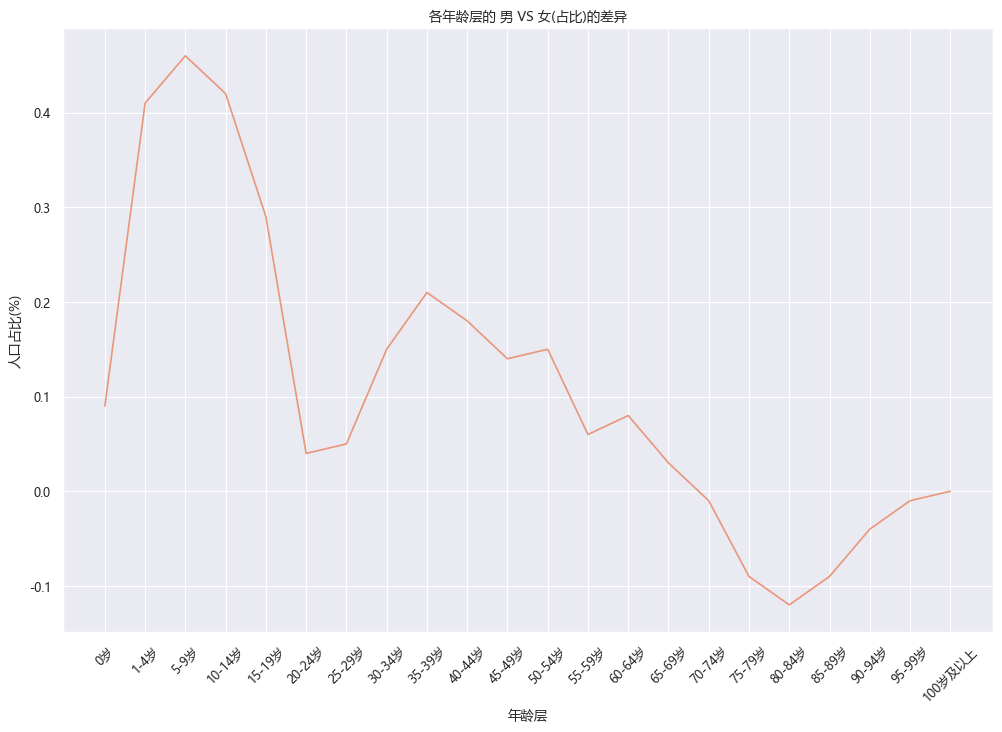

In [56]:
#构建数据框
data = {'index': result['年龄段'].unique(),
        '男': result[result['性别']=='男']['人口占比'].values,
        '女': result[result['性别']=='女']['人口占比'].values,
        }
Data = pd.DataFrame(data)
Data['差异']=Data['男']-Data['女']
#绘制线图
plt.figure(1,figsize=(12,8), dpi=100)
sns.lineplot(x=Data['index'],y=Data['差异'],color='DarkSalmon')
plt.xlabel("年龄层")
plt.ylabel("人口占比(%)")
plt.title("各年龄层的 男 VS 女(占比)的差异")
plt.xticks(rotation=45)
plt.show()
